In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from __future__ import print_function
import math
import time
import sys
import random


In [2]:
data_path = 'capstone data/data_train/combined.csv'

raw_data = pd.read_csv(data_path)


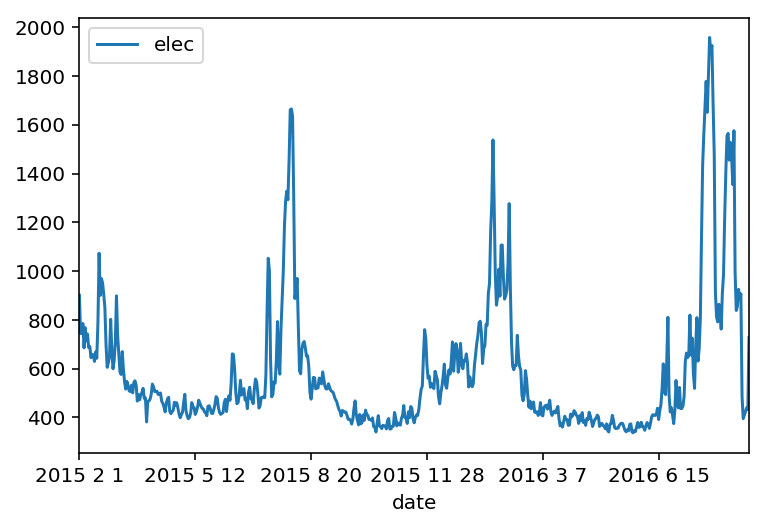

In [3]:
raw_data[:579].plot(x='date', y='elec')


In [4]:
#One-hot encoding

dummy_fields = ['year','month','day','weekday','instance']
for each in dummy_fields:
    dummies = pd.get_dummies(raw_data[each], prefix=each, drop_first=False)
    raw_data = pd.concat([raw_data, dummies], axis=1)

fields_to_drop = ['year', 'month', 'day','date','weekday','instance']
data = raw_data.drop(fields_to_drop, axis=1)


In [5]:
#Normalization

quant_features = ['high', 'low', 'temp', 'hum', 'elec']
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std


In [6]:
# test data
test_data = data[-3000:]


# Now remove the test data from the data set 
data = data[:-3000]


# Separate the data into features and targets
target_fields = ['elec']
features, targets = data.drop(target_fields, axis=1), data[target_fields]

test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]
test_features = np.array(test_features)


In [7]:
#data indices
l = []
for x in range(1,22000):
    l.append(x)


In [8]:
# training data indices
m=random.sample(range(22000),20000)


In [9]:
#validation data indices
n = [i for i in l if i not in m]
print(len(n))
print(n)

2000
[29, 33, 56, 59, 81, 101, 156, 164, 174, 191, 228, 234, 268, 285, 286, 295, 311, 324, 327, 330, 353, 361, 383, 388, 427, 430, 433, 434, 445, 446, 487, 495, 503, 525, 527, 542, 549, 552, 553, 577, 584, 592, 617, 621, 631, 651, 659, 669, 672, 673, 689, 694, 701, 707, 716, 723, 758, 770, 784, 800, 812, 813, 821, 822, 838, 844, 848, 859, 867, 874, 877, 892, 896, 897, 910, 938, 939, 946, 965, 981, 985, 999, 1003, 1014, 1016, 1026, 1034, 1051, 1053, 1057, 1069, 1082, 1099, 1105, 1109, 1123, 1145, 1172, 1173, 1185, 1191, 1221, 1224, 1229, 1242, 1253, 1261, 1269, 1278, 1280, 1301, 1310, 1320, 1321, 1345, 1354, 1361, 1366, 1399, 1431, 1434, 1441, 1474, 1477, 1478, 1484, 1518, 1535, 1548, 1555, 1569, 1579, 1599, 1612, 1613, 1634, 1656, 1657, 1661, 1663, 1664, 1719, 1725, 1743, 1766, 1772, 1791, 1798, 1804, 1828, 1829, 1830, 1833, 1859, 1866, 1885, 1896, 1897, 1910, 1913, 1920, 1922, 1929, 1931, 1937, 1954, 1961, 1964, 1976, 1988, 1995, 2001, 2013, 2060, 2064, 2080, 2082, 2096, 2104, 2111, 2

In [10]:
#training data


#train_features, train_targets = features[6000:], targets[6000:]
#train_features = np.array(train_features)
#train_labels = np.array(train_targets)


features = np.array(features)
targets = np.array(targets)
train_features, train_targets= features[m], targets[m]
train_features = np.array(train_features)
train_labels = np.array(train_targets)


In [11]:
#validation data

val_features, val_targets = features[n], targets[n]
val_features = np.array(val_features)
val_labels = np.array(val_targets)


In [12]:
# define batches function
def batches(batch_size, features, labels):
    """
    Create batches of features and labels
    :param batch_size: The batch size
    :param features: List of features
    :param labels: List of labels
    :return: Batches of (Features, Labels)
    """
    assert len(features) == len(labels)
    outout_batches = []
    
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
        
    return outout_batches

In [13]:
#defind add layer function
def add_layer(inputs, in_size, out_size, activation_function = None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size], stddev=in_size**-0.5))
    bias = tf.Variable(tf.zeros([out_size]))
    if activation_function is None:
        outputs = tf.matmul(inputs,Weights)+bias
    else:
        outputs = activation_function(tf.matmul(input,Weights)+bias)
    return outputs

In [14]:
#parameters for the network

input_size = train_features.shape[1]
first_layer = 32
second_layer = 10
output_size = 1
learning_rate = 0.003


In [15]:
#placeholder for data

input = tf.placeholder("float", [None, input_size])
label = tf.placeholder("float", [None, output_size])

In [16]:
# add layers step by step

#Weights = tf.Variable(tf.random_normal([input_size, first_layer], stddev=input_size**-0.5))
#bias = tf.Variable(tf.zeros([first_layer]))
#l1 =  tf.nn.sigmoid(tf.matmul(input,Weights)+bias)

#Weights1 = tf.Variable(tf.random_normal([first_layer, second_layer], stddev=first_layer**-0.5))
#bias1 = tf.Variable(tf.zeros([second_layer]))
#l2 =  tf.nn.sigmoid(tf.matmul(l1,Weights1)+bias1)

#Weights2 = tf.Variable(tf.random_normal([second_layer, output_size], stddev=second_layer**-0.5))                     
#bias2 = tf.Variable(tf.zeros([output_size]))
#y = tf.matmul(l2, Weights2 ) + bias2


In [17]:
# add layers by using add_layer function

l1 = add_layer(input, input_size, first_layer, activation_function = tf.nn.sigmoid)
y = add_layer(l1, first_layer, output_size, activation_function = None)




In [18]:
#train optimizer

loss= tf.reduce_mean(tf.square(y-label))
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [19]:
#init

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [20]:
#training

batch_size = 128
iterations = 200000


losses = {'train':[], 'validation':[]}
for i in range(iterations):
    
    indices = np.random.choice(train_features.shape[0], size=batch_size)

    batch_x, batch_y= train_features[indices], train_labels[indices]
    
    sess.run(train, feed_dict={input: batch_x, label:batch_y})
    
    if (i) % 300 == 0:
      
        
        cc = sess.run(loss, feed_dict={input: train_features, label:train_labels})
      
        dd = sess.run(loss, feed_dict={input: val_features, label:val_labels})
        
        sys.stdout.write("\rProgress: {:2.1f}".format(100 * i/float(iterations)) \
                     + "% ... Training loss: " + str(cc)[:5] \
                     + " ... Validation loss: " + str(dd)[:5])
        sys.stdout.flush()

        losses['train'].append(cc)
        losses['validation'].append(dd)
        

Progress: 99.9% ... Training loss: 0.073 ... Validation loss: 0.071

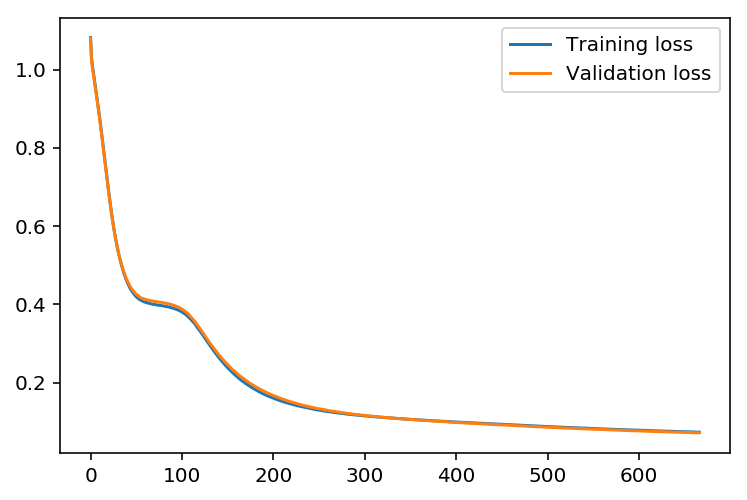

In [21]:
# plot training loss and validation loss

plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

In [22]:
#another way of training using batches function

##batch_size = 578
##epochs = 10000
##learn_rate = 0.1
##train_batches = batches(batch_size, train_features, train_labels)
##val_batches = batches(batch_size, val_features,val_labels )





##for i in range(epochs):
   
       
    ##for batch_features, batch_labels in train_batches:
             
      ##      sess.run(train, feed_dict={input: batch_features,label: batch_labels})
            
   ## if (i) % 300 == 0:
    ##    cc = sess.run(loss, feed_dict={input: train_features, label:train_labels})
    ##    print("afdads",cc)
        
    
    ##for batch_val_features, batch_val_labels in val_batches:
             
    ##        sess.run(train, feed_dict={input: batch_val_features,label: batch_val_labels})  
   ## if (i) % 300 == 0:
   ##     dd = sess.run(loss, feed_dict={input: val_features, label:val_labels})
   ##     print(dd)

In [23]:
#reference
    
    #atch_xs, batch_ys = train.next_batch(128)
    #batch_x = np.random.choice(train_features, size=128)  
   #batch_y = np.random.choice(train_targets, size=128)
   # sess.run(train, feed_dict={input: batch_x, label:batch_y})  
    #if (i) % 300 == 0:
       # cc = sess.run(loss, feed_dict={input: batch_x, label:batch_y})

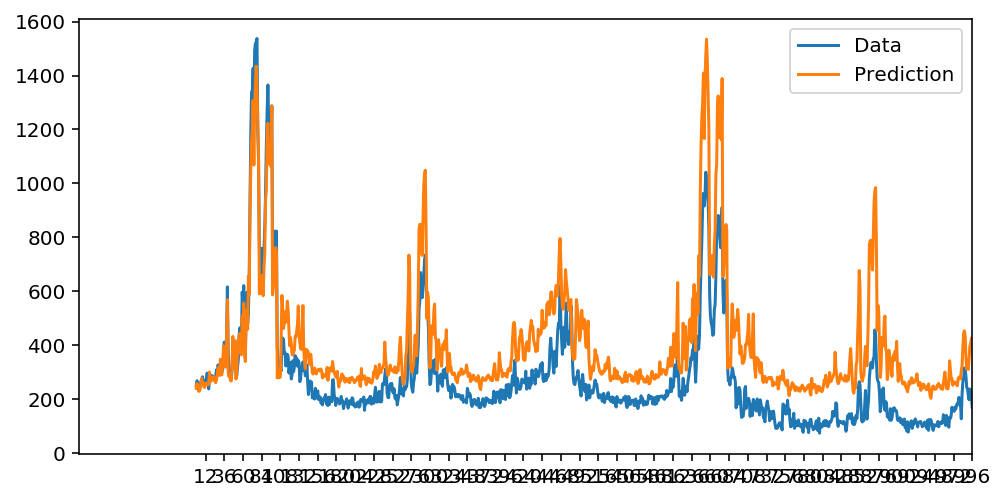

In [24]:
#prediction 

fig, ax = plt.subplots(figsize=(8,4))
mean, std = scaled_features['elec']
ax.plot((test_targets['elec']*std + mean).values, label='Data')


prediction = sess.run(y, feed_dict={input: test_features })
predictions = prediction.T*std + mean
ax.plot(predictions[0], label='Prediction')
ax.set_xlim(right=len(predictions))
ax.legend()
ax.set_xticks(np.arange(1000)[12::24])
#_ = ax.set_xticklabels(dates[12::24], rotation=45)